# Heart Failure Prediction

### This is a machine Learning project where  we build a model  to predict heart failure in an individual

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

## Importing Necessary Libraries


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
pd.set_option('display.max_rows',None)
df = pd.read_csv('heart.csv')


In [71]:
df.shape
print(f'Our dataset has {df.shape[0]} rows and {df.shape[1]} columns')

Our dataset has 918 rows and 12 columns


In [72]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [73]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

The data have no null values

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
data = pd.Series({'Age': 'age of the patient [years]',
'Sex': 'sex of the patient [M: Male, F: Female]',
'ChestPainType' : 'chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]',
'RestingBP': 'resting blood pressure [mm Hg]',
'Cholesterol': 'serum cholesterol [mm/dl]',
'FastingBS': 'fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]','RestingECG': 'resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes\' criteria]','MaxHR' : 'maximum heart rate achieved [Numeric value between 60 and 202]',
'ExerciseAngina' : 'exercise-induced angina [Y: Yes, N: No]','Oldpeak': 'oldpeak = ST [Numeric value measured in depression]',
'ST_Slope': 'the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]',
'HeartDisease' : 'output class [1: heart disease, 0: Normal]'})

datas = pd.DataFrame(data, columns = ['Description'])
print(datas.to_markdown(tablefmt="grid"))

+----------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                | Description                                                                                                                                                                                                                                |
+================+============================================================================================================================================================================================================================================+
| Age            | age of the patient [years]                                                                                                                                                                                           

All the dtype are matched to the corresponding heading. So there is nothing to clean. We proceed to Data Visualisation and Feature Engineering.

## Data Visualisation

In [75]:
categorical = [cat for cat in df.columns if df[cat].dtype == 'O']

numerical = [cat for cat in df.columns if df[cat].dtype != 'O']



In [76]:
df.describe(include = 'all')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,M,ASY,NaN,NaN,NaN,Normal,NaN,N,NaN,Flat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


## Data Visualization

In [85]:
data1 = df

**What is the relationship between age and HeartFailure?**

<AxesSubplot:xlabel='Age', ylabel='Count'>

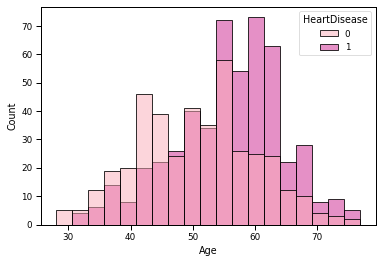

In [95]:
sns.histplot(data = df, x = 'Age', hue = 'HeartDisease', palette = 'RdPu')
#sns.countplot(data= df, x='Age',hue='HeartDisease')

From the visualization above, the heart failure is precedent from age 55 years.

**Counts of sex category**

In [86]:
sex_counts = data1["Sex"].value_counts(normalize=True).round(2) * 100
sex_counts = sex_counts.reset_index().rename(columns={"Sex": "Pct", "index": "Sex"})
sex_counts

,Sex,Pct
0,M,79.0
1,F,21.0


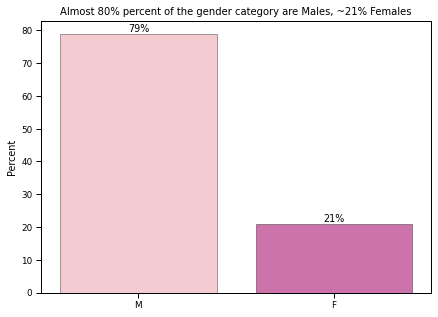

In [90]:
plt.figure(figsize=(7, 5))
sns.set_context("paper")



ax1 = sns.barplot(
    data=sex_counts,
    x="Sex",
    #errorbar=None,
    y="Pct",
    palette= "RdPu",
    linewidth=0.5,
    edgecolor="black",
    alpha=0.7,
)

values1 = ax1.containers[0].datavalues
labels = ["{:g}%".format(val) for val in values1]
ax1.bar_label(ax1.containers[0], labels=labels)

ax1.set_ylabel("Percent")
ax1.set_xlabel("")
ax1.set_title(
    "Almost 80% percent of the gender category are Males, ~21% Females", fontsize=10
)


plt.show()


The data has more Males than Females and this might skew our model

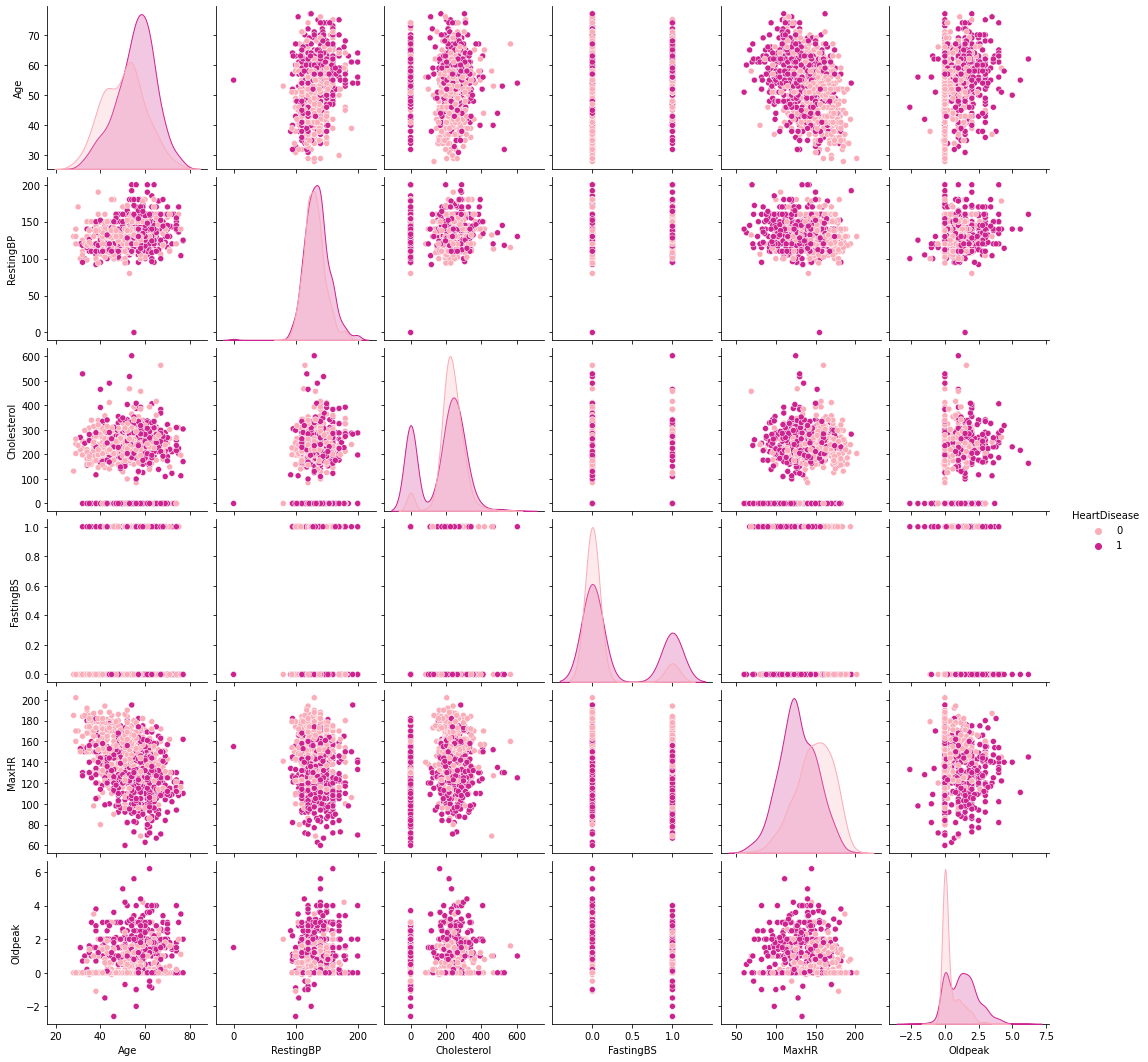

In [10]:
sns.pairplot(df, hue="HeartDisease",palette = "RdPu")

<AxesSubplot:>

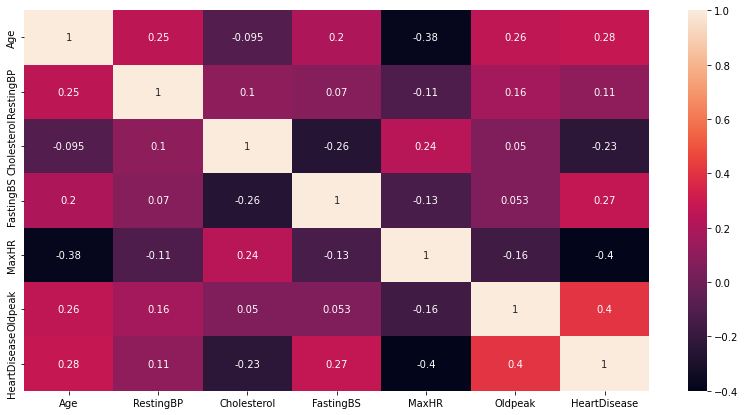

In [11]:
plt.figure(figsize = (14,7))
sns.heatmap(df.corr(),annot = True)

The diagram above displays the correlation between the variables. The pearson correlation coefficient ranges from -1 to +1 such that positive coefficient values closer to 1 indicate strong correlation (meaning that as one variable increases the other also increases) while negative coefficient values closer to -1 also indicate strong correlation but with a different interpretation (as one variable increases the other decreases).

Asides from the coefficients, the color is also indicative of correlation, so the darker the color the higher the correlation and vice versa. Therefore, from the diagram, it can be observed that there is an overall low to moderate degree of correlation between variables bearing positive coefficient values (especially considering the features,Age,RestingBP, fasting blood sugar and old peak to the label-heart disease). While Max heart rate has a negative-moderate correlation to heart disease. Age and MaxHR also have negative moderate correlation.

<AxesSubplot:xlabel='HeartDisease', ylabel='Oldpeak'>

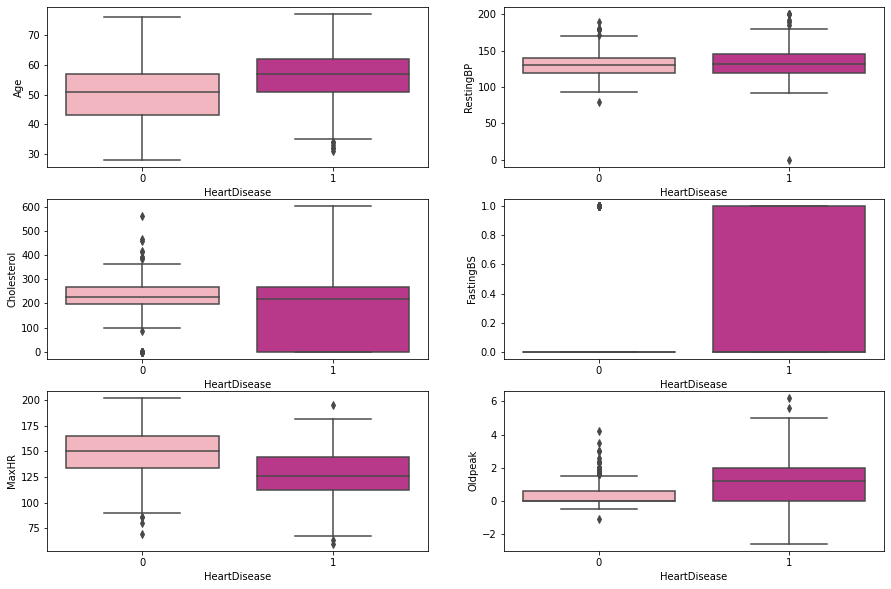

In [12]:
plt.figure(figsize=(15,10))

plt.subplot(3,2,1)
sns.boxplot(x = df.HeartDisease, y = df.Age,  palette = "RdPu")
plt.subplot(3,2,2)
sns.boxplot(x = df.HeartDisease, y = df.RestingBP, palette = "RdPu")
plt.subplot(3,2,3)
sns.boxplot(x = df.HeartDisease, y = df.Cholesterol,  palette = "RdPu")
plt.subplot(3,2,4)
sns.boxplot(x = df.HeartDisease, y = df.FastingBS,  palette = "RdPu")
plt.subplot(3,2,5)
sns.boxplot(x = df.HeartDisease, y = df.MaxHR,  palette = "RdPu")
plt.subplot(3,2,6)
sns.boxplot(x = df.HeartDisease, y = df.Oldpeak,  palette = "RdPu")





From the boxplot display, the mean age and mean oldpeak  for persons with heart disease was greater than those without heart disease. Hence, it could be inferred that as persons advance in age they are more likely to develop a heart disease while those who have had an oldpeak record also have an increased tendency to come down with a heart disease. in the fifth subplot however, heart disease was diagnosed in persons with lower Maximum heart rate. Therefore, indicating that as maximum heartrate decreases the probablity that a person develops a heart disease increases.

All the labels contained outliers while majority of persons with a fasting blood sugar higher than 120mg/dl were with a form of heart  disease.

The cholesterol and Oldpeak subplots displayed negative skewness while MaxHR showed a positive skewness.Thus, indicating that majority of persons with heart disease had a cholesterol level of <200mg/dl(Medium-low risk), an oldpeak below 1.8 (low risk) and a MaxHR above 125(low-medium risk)

<AxesSubplot:xlabel='ST_Slope', ylabel='Count'>

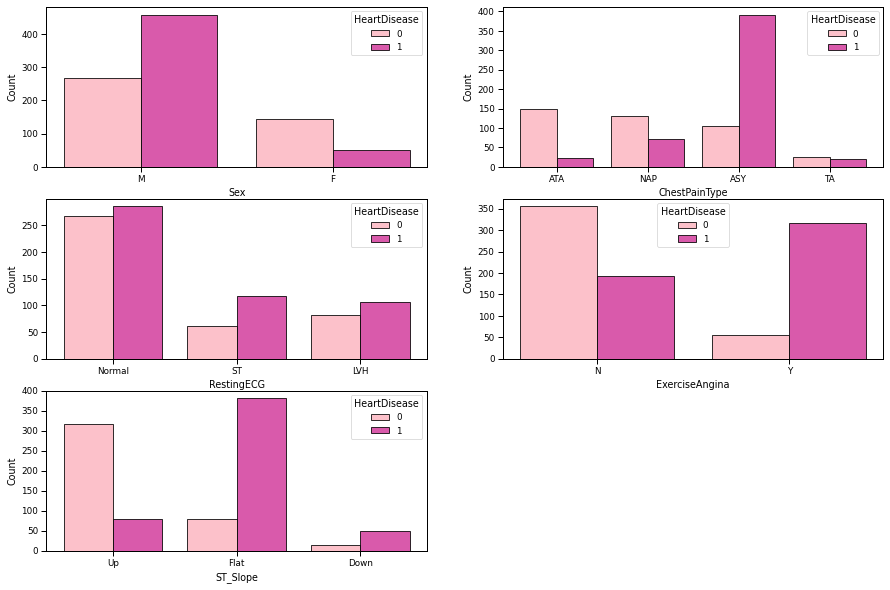

In [101]:
plt.figure(figsize=(15,10))

plt.subplot(3,2,1)
#plt.title('Sex')
fig = sns.histplot(data = df, x ='Sex', hue = 'HeartDisease', multiple="dodge", shrink=.8, palette = "RdPu")


plt.subplot(3,2,2)
#plt.title('Chest Pain Type')
sns.histplot(data = df, x ='ChestPainType', hue = 'HeartDisease', multiple="dodge", shrink=.8, palette = "RdPu")


plt.subplot(3,2,3)
#plt.title('RestingECG')
sns.histplot(data = df, x ='RestingECG', hue = 'HeartDisease', multiple="dodge", shrink=.8, palette = "RdPu")


plt.subplot(3,2,4)
#plt.title('ExerciseAngina')
sns.histplot(data = df, x ='ExerciseAngina', hue = 'HeartDisease', multiple="dodge", shrink=.8, palette = "RdPu")


plt.subplot(3,2,5)
#plt.title('ST_Slope')
sns.histplot(data = df, x ='ST_Slope', hue = 'HeartDisease', multiple="dodge", shrink=.8, palette = "RdPu")





#####  A Summary Plot
- **Subplot 1:** This plot shows us that more percentage of Males have heart failure than Females 
- **Subplot 2:** This plot shows us that when a greater percentage of heart dsease have asymptomatic pain while other pains may or maynot lead to heart disease.
- **Subplot 3:** Generally having a normal, ST or left ventricular hypertrophy is not a definite measure of Heart Disease thogh a greater percentage of ST abnormality wave have heart Diseasw
- **Subplot 4:** Exercise Angina is pain gotten after exercising. We can see that most people that have this pain has heart Disease 
- **Subplot 5:**  the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] I can say from this visualization that an 'up' slope is the safest to have

In [16]:
df[categorical]

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
5,M,NAP,Normal,N,Up
6,F,ATA,Normal,N,Up
7,M,ATA,Normal,N,Up
8,M,ASY,Normal,Y,Flat
9,F,ATA,Normal,N,Up


In [14]:
df.loc[df.RestingBP <= 50].index
df.drop(449,inplace = True)


Some Analytic Questions



## Feature Engineering




In [113]:
data = df.copy()
for colname in data.select_dtypes("object"):
    data[colname], _ = data[colname].factorize()
#this code obtains a numeric representation of an array identifying distinct values.

In [116]:
X = data.copy()
y = X.pop('HeartDisease')
X.dtypes
#X.dtypes is numeric so we are good to go

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
dtype: object

#### Feature engineering by Mutual Information


In [19]:
from sklearn.feature_selection import mutual_info_classif

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores  # show a few features with their MI scores

ST_Slope          0.199752
ChestPainType     0.161788
ExerciseAngina    0.131742
Oldpeak           0.129046
MaxHR             0.089033
Cholesterol       0.081396
FastingBS         0.066576
Sex               0.045003
RestingBP         0.036798
Age               0.026839
RestingECG        0.000000
Name: MI Scores, dtype: float64

- The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other.

- Heart Disease has little or no dependence on RestingECG, Age and Resting Bp.

#### Feature engineering by K best

In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
   #target column 
#apply SelectKBest class to extract top best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
X = X.drop('Oldpeak', axis = 1)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print best features


            Specs        Score
4     Cholesterol  2943.350498
7           MaxHR   699.806744
9        ST_Slope   165.189341
8  ExerciseAngina   134.048709
0             Age   121.262687
2   ChestPainType    96.820158
1             Sex    67.402230
5       FastingBS    50.489897
3       RestingBP    31.172304
6      RestingECG     3.762281


OldPeak column was removed because it has a negative value, and chi2 deals only with positive values

In [123]:
for i in data.columns:
    print(i,len(df[i].unique()))
                       
    

Age 50
Sex 2
ChestPainType 4
RestingBP 67
Cholesterol 222
FastingBS 2
RestingECG 3
MaxHR 119
ExerciseAngina 2
Oldpeak 53
ST_Slope 3
HeartDisease 2


From the cardinality, we can bin the high unique values like Age and Cholesterol for a better model

<AxesSubplot:>

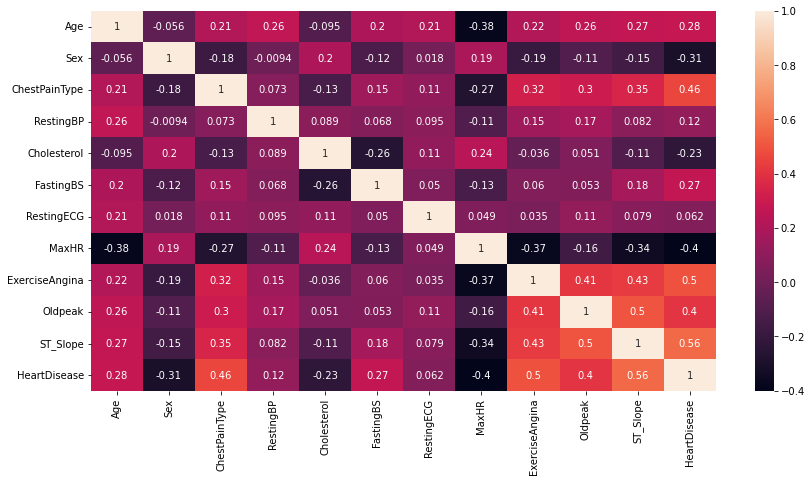

In [23]:
plt.figure(figsize = (14,7))
sns.heatmap(data.corr(),annot = True)

Selecting best features is important process when we prepare a large dataset for training. It helps us to eliminate less important part of the data and reduce a training time. From all the feature Enginnering, we decided to drop
- RestingECG
- RestingBP

## Data Preprocessing

In [24]:
df[categorical]

num = []
for cat in df[categorical]:
    a = len(df[cat].unique())
    num.append(a)
print(num)
df[categorical]

[2, 4, 3, 2, 3]


,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up
5,M,NAP,Normal,N,Up
6,F,ATA,Normal,N,Up
7,M,ATA,Normal,N,Up
8,M,ASY,Normal,Y,Flat
9,F,ATA,Normal,N,Up


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [165]:
new_df = df.copy()
new_df.drop(['RestingECG','RestingBP'], axis = 1, inplace = True) #according to our feature engineering

In [167]:
#transforming categorical variables using the label encoding method
new_df['Sex'] = le.fit_transform(new_df['Sex'])
new_df['ChestPainType'] = le.fit_transform(new_df['ChestPainType'])
new_df['ExerciseAngina'] = le.fit_transform(new_df['ExerciseAngina'])
new_df['ST_Slope'] = le.fit_transform(new_df['ST_Slope'])

In [125]:
numerical.remove('RestingBP')#removing RestingBP
new_df[numerical]

,Age,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,289,0,172,0.0,0
1,49,180,0,156,1.0,1
2,37,283,0,98,0.0,0
3,48,214,0,108,1.5,1
4,54,195,0,122,0.0,0
5,39,339,0,170,0.0,0
6,45,237,0,170,0.0,0
7,54,208,0,142,0.0,0
8,37,207,0,130,1.5,1
9,48,284,0,120,0.0,0


## Machine Learning

In [127]:
#IMPORTING MODELS AND NECESSARY LIBRARIES
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,roc_curve,ConfusionMatrixDisplay,classification_report,roc_auc_score,confusion_matrix

Scaler = MinMaxScaler()#for an appropriate scale



In [158]:
X = new_df.copy()

y= X.pop('HeartDisease')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 43)
#scaling the train data
X_train['Age']= Scaler.fit_transform(X_train[['Age']])
X_train['FastingBS']= Scaler.fit_transform(X_train[['FastingBS']])
X_train['Cholesterol'] = Scaler.fit_transform(X_train[['Cholesterol']])
X_train['MaxHR'] = Scaler.fit_transform(X_train[['MaxHR']])

X_train



,Age,Sex,ChestPainType,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
477,0.666667,1,0,0.000000,1.0,0.303704,1,2.0,0
778,0.604167,1,0,0.429519,0.0,0.466667,1,3.0,1
0,0.229167,1,1,0.479270,0.0,0.777778,0,0.0,2
613,0.604167,1,0,0.638474,1.0,0.503704,0,0.3,2
401,0.458333,1,0,0.000000,1.0,0.711111,0,0.0,1
576,0.687500,1,0,0.281924,0.0,0.392593,1,3.0,1
102,0.229167,0,0,0.650083,0.0,0.466667,0,2.0,1
310,0.750000,1,0,0.000000,0.0,0.644444,0,1.0,2
230,0.166667,1,0,0.522388,0.0,0.674074,0,0.0,2
348,0.833333,1,0,0.000000,0.0,0.274074,1,1.6,1


In [130]:
print("Size of training set:", X_train.shape)


Size of training set: (642, 9)


In [131]:
#scaling the test_data

X_test['Age']= Scaler.fit_transform(X_test[['Age']])
X_test['FastingBS']= Scaler.fit_transform(X_test[['FastingBS']])
X_test['Cholesterol'] = Scaler.fit_transform(X_test[['Cholesterol']])
X_test['MaxHR'] = Scaler.fit_transform(X_test[['MaxHR']])
print("Size of test set:", X_test.shape)

Size of test set: (276, 9)


The aim of this project is to predict who might possibly have heart failure given some attributes hence a **classification problem**. 

There are a lot of claasification models out there but we used:
- Logistic Regression
- Support Vector Classifier
- Random Forest Classifier
- Gradient Boosting Classifier

In [132]:
def ML(model, X_train = X_train,X_test = X_test,y_train = y_train,y_test = y_test):
    """ 
    This function takes in the type of model you want to run 
    with an already defined X_train,X_test,y_train and y_test then
    gives the accuracy, confusionmatrix and classification report
    
    """
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    print('Accuracy score of this model : ', accuracy_score(y_test, y_pred_test))
    cm =confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    print(classification_report(y_test, y_pred_test))



#### Logistic Regression

In [133]:
logreg = LogisticRegression(random_state=0)

Accuracy score of this model :  0.8369565217391305
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       116
           1       0.86      0.86      0.86       160

    accuracy                           0.84       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276



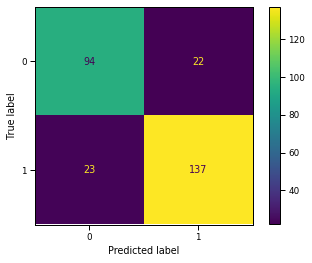

In [134]:
ML(logreg)

In [40]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test, y_pred_test)
cm

array([[ 89,  21],
       [ 29, 137]], dtype=int64)

In [41]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78       110
           1       0.87      0.83      0.85       166

    accuracy                           0.82       276
   macro avg       0.81      0.82      0.81       276
weighted avg       0.82      0.82      0.82       276



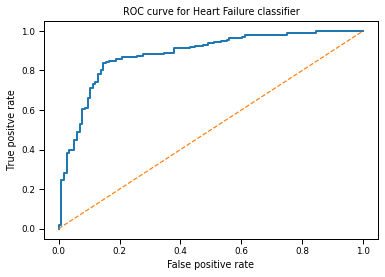

Area under this curve is 0.8810883620689656


In [135]:
def AUC_curve(model,y_test = y_test, X_test = X_test):
    """
    This function shows  the AUC_curve and score of an a
    already trained model
    
    """
    y_pred1 = model.predict_proba(X_test)[:,1]
    y_pred0 = model.predict_proba(X_test)[:,0]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
    plt.figure(figsize = (6,4))
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], '--')
    plt.title('ROC curve for Heart Failure classifier')
    plt.xlabel('False positive rate')
    plt.ylabel('True positve rate')
    plt.show()
    ROC_AUC = roc_auc_score(y_test,y_pred1)
    print(f'Area under this curve is {ROC_AUC}')
    
    
AUC_curve(logreg)

#### Tuning Logistic Regression

In [136]:
C_param_range = [0.001,0.01,0.1,1,10,100]

logreg_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
logreg_table['C_parameter'] = C_param_range


j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    lr = LogisticRegression(C = i,random_state = 0)
    lr.fit(X_train,y_train)
    
    # Predict using model
    y_pred = lr.predict(X_test)
    
    # Saving accuracy score in table
    print(f'Accuracy Score for C = {i} is {accuracy_score(y_test,y_pred)}')
    #j += 1
    
    # Printing decision regions
    #print(classification_report(y_test, y_pred))


Accuracy Score for C = 0.001 is 0.7355072463768116
Accuracy Score for C = 0.01 is 0.8007246376811594
Accuracy Score for C = 0.1 is 0.8333333333333334
Accuracy Score for C = 1 is 0.8369565217391305
Accuracy Score for C = 10 is 0.8405797101449275
Accuracy Score for C = 100 is 0.8405797101449275


Accuracy score of this model :  0.8405797101449275
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       116
           1       0.87      0.86      0.86       160

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



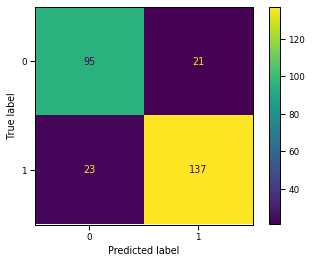

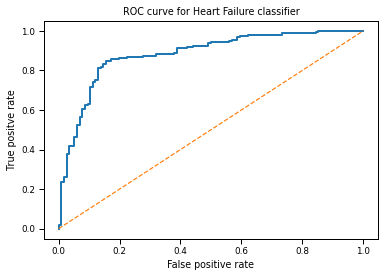

Area under this curve is 0.8814116379310344


In [142]:
#The best accuracy score is C = 10 or 100
logreg2 = LogisticRegression(C = 10,random_state = 0)
ML(logreg2)
AUC_curve(logreg2)

#### Standard Vector Classifier

Accuracy score of this model :  0.8297101449275363
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       116
           1       0.86      0.85      0.85       160

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276



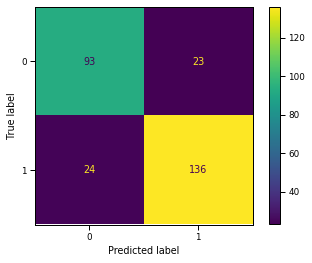

In [143]:
svc_model= SVC(kernel = 'linear',probability = True)
ML(svc_model)

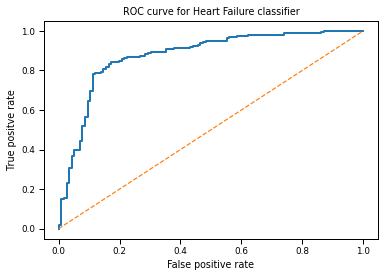

Area under this curve is 0.8752155172413792


In [144]:
AUC_curve(svc_model)

#### Tuning the SVC model

In [151]:
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)
print(f'Best parameters are: {clf.best_params_}')
GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf', 'poly')})


Best parameters are: {'C': 10, 'kernel': 'rbf'}


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf', 'poly')})

Accuracy score of this model :  0.8442028985507246
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       116
           1       0.85      0.89      0.87       160

    accuracy                           0.84       276
   macro avg       0.84      0.83      0.84       276
weighted avg       0.84      0.84      0.84       276



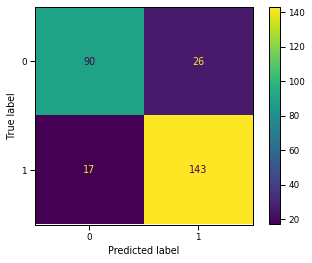

In [152]:
svc = SVC(C = 1,kernel = 'rbf',probability = True)
ML(svc)

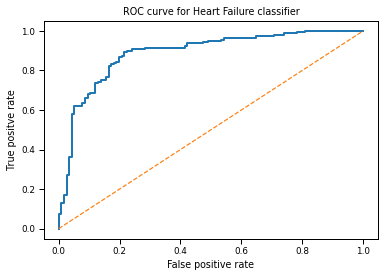

Area under this curve is 0.8871228448275862


In [153]:
AUC_curve(svc)

#### Random Forest Classifier

Accuracy score of this model :  0.8369565217391305
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       116
           1       0.84      0.88      0.86       160

    accuracy                           0.84       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276



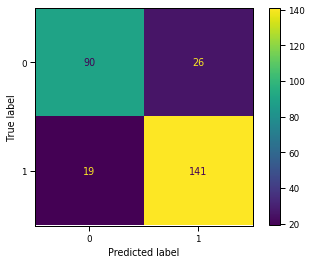

In [154]:
RFC = RandomForestClassifier()
ML(RFC)

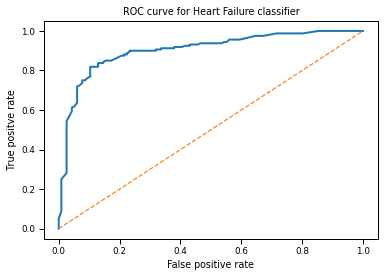

Area under this curve is 0.9028825431034483


In [155]:
AUC_curve(RFC)

#### Tuning Random Forest Regression

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
Accuracy score of this model :  0.8514492753623188
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       116
           1       0.87      0.88      0.87       160

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



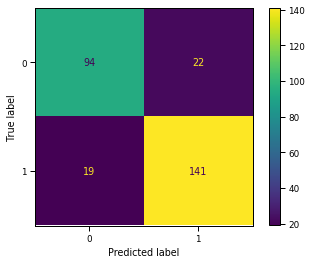

In [162]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(RFC, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
ML(gridF)

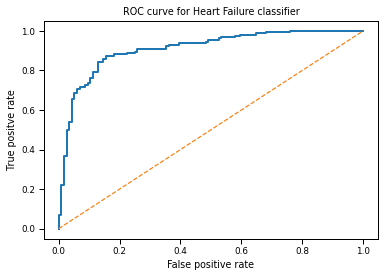

Area under this curve is 0.9088362068965516


In [164]:
AUC_curve(gridF)

#### Gradient Boosting Classifier Model

Accuracy score of this model :  0.8369565217391305
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       116
           1       0.85      0.87      0.86       160

    accuracy                           0.84       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.84      0.84      0.84       276



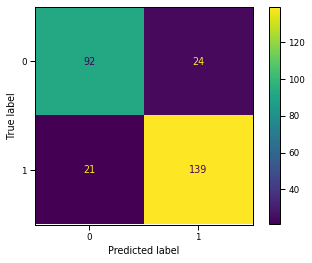

In [157]:
GBC = GradientBoostingClassifier()
ML(GBC)

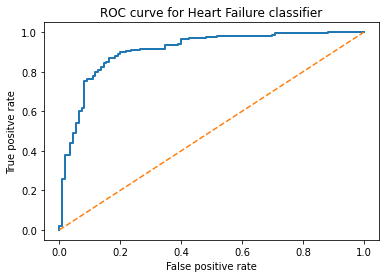

Area under this curve is 0.9065717415115004


In [52]:
AUC_curve(GBC)

#### Gradient Boosting Classifier Tuning

In [159]:
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}


Accuracy score of this model :  0.855072463768116
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       116
           1       0.88      0.88      0.88       160

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.86      0.86      0.86       276



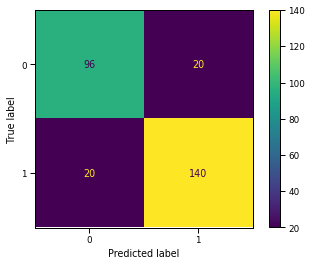

In [160]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(GBC,parameters,cv=5)
print(f'Best parameters are: {cv.best_params_}')
ML(cv)

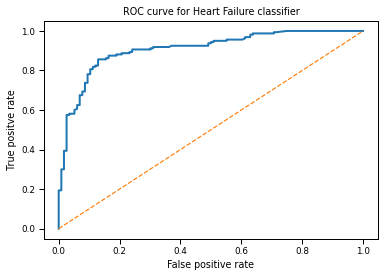

Area under this curve is 0.9080549568965517


In [161]:
AUC_curve(cv)